In [12]:
import numpy as np
import csv 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

## Загрузка данных формата XYZ

In [13]:
XYZ = pd.read_csv(source/'Extract value^ CUB_FIL4_ANON [Realized] 1; -9', sep =' ', header=None, names=['X', 'Y', 'Z'])
XYZ

,X,Y,Z
0,536250.0,6674050.0,-13685.744141
1,536350.0,6674050.0,-10949.601562
2,536450.0,6674050.0,-10691.712891
3,536550.0,6674050.0,-8162.351074
4,536650.0,6674050.0,-7442.798340
...,...,...,...
36981,556250.0,6697950.0,2135.326172
36982,556350.0,6697950.0,1964.547363
36983,556450.0,6697950.0,-4324.702637
36984,556550.0,6697950.0,-1545.582642


## Таблица данных матричного типа

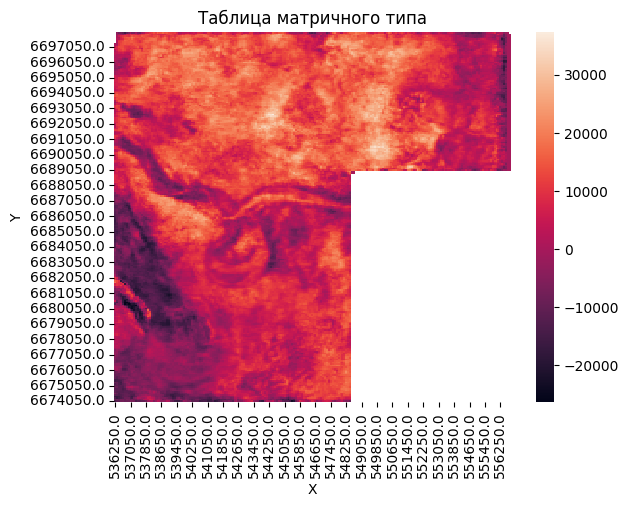

In [16]:
heatmap = pd.pivot_table(XYZ, index='Y',columns='X',values='Z')# Преобразовываем в таблицу данных матричного вида 
sns.heatmap(heatmap) # Строим тепловую карту 
plt.gca().invert_yaxis() # Отсортируем значение по оси Y во время визуализации

plt.title('Таблица матричного типа');

## Загрузка скважин

In [17]:
Well = pd.read_excel(source/'well_coord.xlsx')
Well 

,X,Y,well
0,544422.77,6681000.75,300PO
1,540149.85,6693456.41,302PO
2,535434.32,6686783.46,303PO
3,540401.63,6696685.04,304PO
4,546964.75,6696596.50,425R
5,555732.30,6697085.39,429R
6,551948.80,6698914.66,430R
7,541950.00,6681850.00,Fake1
8,544850.00,6685050.00,Fake2
9,539750.00,6687750.00,Fake3


## Алгоритм нахождения ближайшего узла на сейсмической сетке

In [18]:
min_dist = {}
# start = time.time()
for indexw,wel_coord in Well.iterrows():
    min_value = float('inf')
    for indexE, value_mesh in  XYZ.iterrows():
        wel = np.array((wel_coord[0],wel_coord[1]))
        mesh_coord = np.array((value_mesh[0],value_mesh[1]))
        norm = np.linalg.norm(wel - mesh_coord)
        if norm < min_value:
            min_value = norm
            min_dist[wel_coord[2]] = list((indexE,mesh_coord))
# print(time.time() - start)

In [19]:
min_dist

{'300PO': [8692, array([ 544450., 6681050.])],
 '302PO': [27557, array([ 540150., 6693450.])],
 '303PO': [15621, array([ 536250., 6686750.])],
 '304PO': [34152, array([ 540450., 6696650.])],
 '425R': [34011, array([ 546950., 6696550.])],
 '429R': [35129, array([ 555750., 6697050.])],
 '430R': [36938, array([ 551950., 6697950.])],
 'Fake1': [9651, array([ 541950., 6681850.])],
 'Fake2': [13616, array([ 544850., 6685050.])],
 'Fake3': [16886, array([ 539750., 6687750.])]}

In [20]:
heatmap = pd.pivot_table(XYZ, index='Y',columns='X',values='Z')# Переформатируем данные в матричную таблицу

In [21]:
x = []
y = []
for val in min_dist.values():
    x.append(val[1][0])
    y.append(val[1][1])

In [22]:
closest = pd.DataFrame().from_dict({"x": x, "y": y})

In [23]:
min(list(heatmap.index)), max(list(heatmap.index))

(6674050.0, 6697950.0)

In [24]:
dx = (max(list(heatmap.columns)) - min(list(heatmap.columns))) / len(list(heatmap.columns))
dy = (max(list(heatmap.index)) - min(list(heatmap.index))) / len(list(heatmap.index))
dx, dy

(99.51456310679612, 99.58333333333333)

In [25]:
coord_x = (closest["x"] - min(list(heatmap.columns))) / dx

In [26]:
coord_y = (closest["y"] - min(list(heatmap.index))) / dy

In [27]:
name = [] #Составляем список с названием скважин для обозначений на тепловой карте
for i in min_dist.keys():
    name.append(i)

## Тепловая карта со скважинами

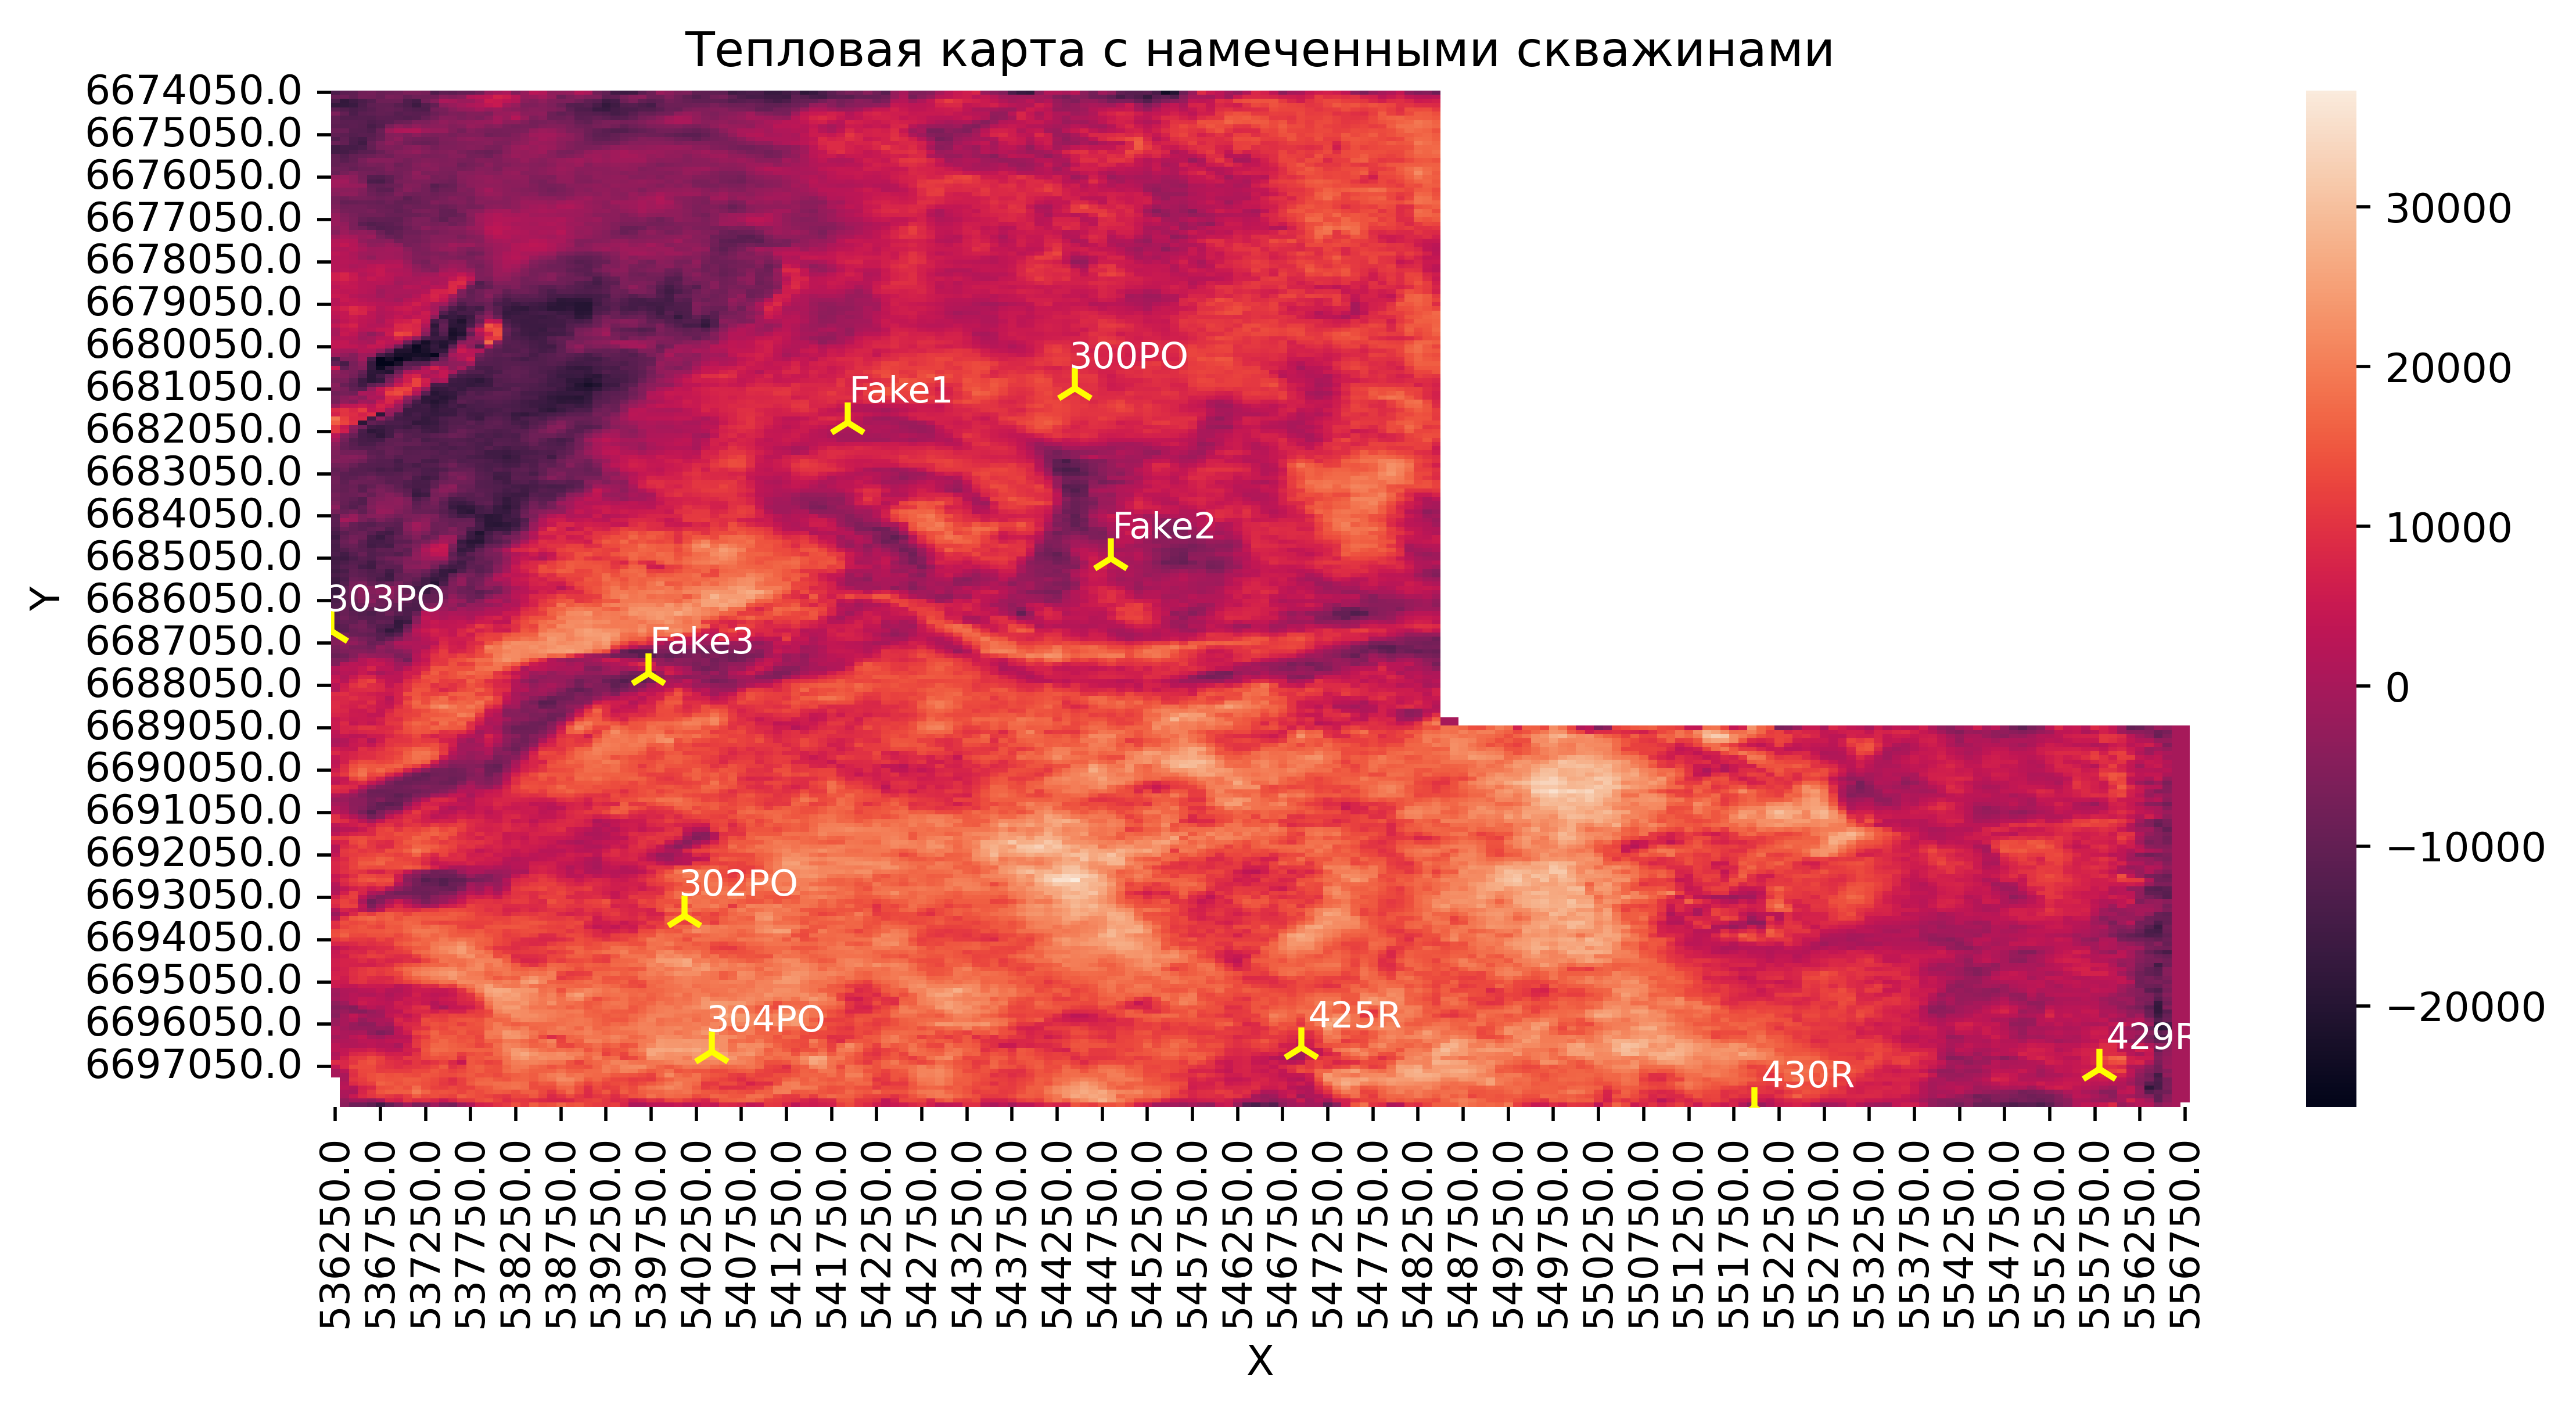

In [29]:
fig = plt.figure(figsize=[10, 5], dpi = 500)
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
sns.heatmap(heatmap, alpha=1)

plt.scatter(
    coord_x, 
    coord_y,
             c="yellow", s=100, marker='2')
for i in range(len(coord_x)):
        ax.text(coord_x[i] + 6 , coord_y[i] - 7, f'{name[i]}', color='white', va='center', ha='center',
         fontsize=9)
plt.title('Тепловая карта с намеченными скважинами');
plt.show()